In [6]:
%matplotlib inline

In [16]:
import pandas as pd
import numpy as np

bah_df = pd.read_excel("~/Downloads/Module2_Caribbean_Assessment_File.xlsx", skiprows=[1], index_col=0)
jam_df = pd.read_excel("~/Downloads/Module2_Caribbean_Assessment_File.xlsx", sheetname=1, skiprows=[1], index_col=0)
trin_df = pd.read_excel("~/Downloads/Module2_Caribbean_Assessment_File.xlsx", sheetname=2, skiprows=[1], index_col=0)
dom_df = pd.read_excel("~/Downloads/Module2_Caribbean_Assessment_File.xlsx", sheetname=3, skiprows=[1], index_col=0)
trin_df.tail()

,tri_curr_avg,tri_curr_eop,tri_tot_empl,tri_unemp_rate,tri_ngdp,tri_rgdp,tri_nimp,tri_rimp,tri_nexp,tri_rexp,tri_cpi_avg,tri_cpi_eop,tri_value_imp,tri_vol_imp,tri_value_exp,tri_vol_exp
2010,6.375508,6.4234,0.592000,5.9,131.289400,89.029200,43.928065,22.140608,77.229634,56.873944,197.015551,193.706221,6.890127,5.076528,12.113487,9.022689
2011,6.409301,6.4156,0.596000,5.0,150.373200,86.731300,63.735235,27.251990,101.801214,NaN,207.071484,203.918258,9.944179,6.226105,15.883357,10.204260
2012,6.429603,6.4323,0.601000,4.8,169.767208,87.810900,61.021166,26.446259,89.684334,NaN,226.253811,218.537595,9.490659,5.981241,13.948659,9.038510
2013,6.442629,6.4665,0.606042,3.7,178.583153,89.229784,66.198203,28.940986,106.167937,55.393110,238.018596,230.792040,10.275029,6.553452,16.478976,10.806908
2014,6.442629,6.4665,0.611126,5.0,190.887663,91.315859,65.479132,28.862351,107.603511,53.967259,249.095359,239.331345,10.163417,6.484589,16.701801,10.951770


In [8]:
### Avg GDP
bah_df['bah_rgdp'].mean()

6.215937538048983

In [9]:
### Jam Max Cpi_avg
jam_df['jam_cpi_avg'].max()

415.46300036960298

In [10]:
### Median Dom Unemployment Rate
dom_df['dom_unemp_rate'].median()

6.531737484184765

In [11]:
### Get Max 2014 growth from 4 countries
jam_2014_growth = (jam_df['jam_rgdp'][2014] - jam_df['jam_rgdp'][2013])/jam_df['jam_rgdp'][2013]
dom_2014_growth = (dom_df['dom_rgdp'][2014] - dom_df['dom_rgdp'][2013])/dom_df['dom_rgdp'][2013]
bah_2014_growth = (bah_df['bah_rgdp'][2014] - bah_df['bah_rgdp'][2013])/bah_df['bah_rgdp'][2013]
trin_2014_growth = (trin_df['tri_rgdp'][2014] - trin_df['tri_rgdp'][2013])/trin_df['tri_rgdp'][2013]
[jam_2014_growth, dom_2014_growth, bah_2014_growth, trin_2014_growth]

[0.0105004069191354,
 0.053000000000002698,
 0.012000000000000068,
 0.023378687982485519]

In [12]:
### Merge all into one df
caribbean_df = pd.concat([jam_df, dom_df, bah_df, trin_df], axis=1)
caribbean_df.head()

,jam_curr_avg,jam_curr_eop,jam_tot_empl,jam_unemp_rate,jam_ngdp,jam_rgdp,jam_nimp,jam_rimp,jam_nexp,jam_rexp,...,tri_nimp,tri_rimp,tri_nexp,tri_rexp,tri_cpi_avg,tri_cpi_eop,tri_value_imp,tri_vol_imp,tri_value_exp,tri_vol_exp
1980,1.78,NaN,0.695628,27.262318,4.565363,457.463232,2.699363,NaN,2.564942,NaN,...,5.845231,22.976771,7.536496,11.147396,21.199595,NaN,2.434417,3.466447,3.138857,3.984715
1981,1.78,NaN,0.727298,25.940575,5.015010,477.683457,3.271429,NaN,2.514608,NaN,...,5.950479,20.696723,7.547601,9.831831,24.237897,NaN,2.478250,3.504405,3.143482,3.301179
1982,1.78,NaN,0.728393,27.576984,5.758048,492.393773,3.433852,NaN,2.393040,NaN,...,8.089642,24.169345,6.696851,9.454611,27.057919,NaN,3.369167,4.092396,2.789155,3.174521
1983,2.47,NaN,0.739348,26.378420,7.101833,512.841717,4.120072,NaN,3.476322,NaN,...,7.517084,23.880103,5.631814,9.037296,31.163959,NaN,3.130708,4.043421,2.345580,3.034402
1984,4.36,NaN,0.775797,25.511570,9.238804,517.712364,6.843410,NaN,6.155112,NaN,...,6.133061,22.337196,5.857806,10.464674,35.319604,NaN,2.554292,3.782173,2.439704,3.513664


In [13]:
### Easily visualize and understand series data
caribbean_df['jam_rgdp'].describe()

count     35.000000
mean     652.181969
std       90.321942
min      457.463232
25%      592.773641
50%      676.591171
75%      729.655422
max      766.971989
Name: jam_rgdp, dtype: float64

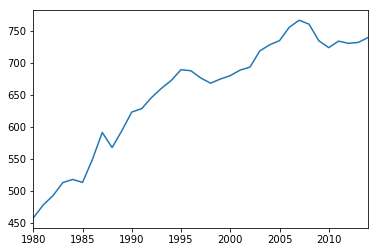

In [14]:
caribbean_df['jam_rgdp'].plot()

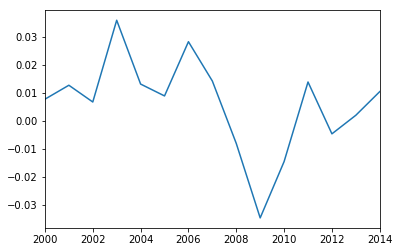

In [26]:
### Create Growth Rate Series for jam_rgdp
caribbean_df['jam_rgdp_growth'] = caribbean_df['jam_rgdp'].pct_change()
caribbean_df['jam_rgdp_log_growth'] = np.log(1 + caribbean_df['jam_rgdp_growth'])
caribbean_df['jam_rgdp_log_growth'].tail(15).plot()

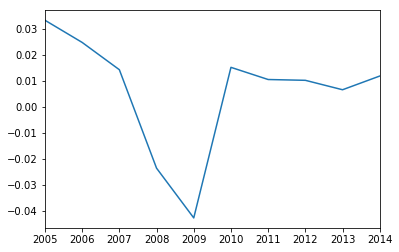

In [32]:
### Create Growth Rate Series for jam_rgdp
caribbean_df['bah_drgdp'] = caribbean_df['bah_rgdp'].pct_change()
caribbean_df['bah_dlrgdp'] = np.log(1 + caribbean_df['bah_drgdp'])
caribbean_df['bah_dlrgdp'].tail(10).plot()

In [30]:
caribbean_df['bah_dlrgdp'].describe()

count    34.000000
mean      0.019869
std       0.032963
min      -0.052103
25%       0.009163
50%       0.023228
75%       0.035593
max       0.110647
Name: bah_dlrgdp, dtype: float64

In [35]:
(caribbean_df[caribbean_df['bah_dlrgdp'] > .019869].shape[0])/(caribbean_df.count())

jam_curr_avg           0.542857
jam_curr_eop           0.863636
jam_tot_empl           0.542857
jam_unemp_rate         0.542857
jam_ngdp               0.542857
jam_rgdp               0.542857
jam_nimp               0.542857
jam_rimp                    inf
jam_nexp               0.542857
jam_rexp                    inf
jam_cpi_avg            0.542857
jam_cpi_eop            0.542857
jam_value_imp          0.542857
jam_vol_imp            0.542857
jam_value_exp          0.542857
jam_vol_exp            0.542857
dom_curr_avg           0.542857
dom_curr_eop           0.791667
dom_tot_empl           1.266667
dom_unemp_rate         0.791667
dom_ngdp               0.542857
dom_rgdp               0.542857
dom_nimp               0.542857
dom_rimp               0.542857
dom_nexp               0.542857
dom_rexp               0.542857
dom_cpi_avg            0.542857
dom_cpi_eop            0.542857
dom_value_imp          0.542857
dom_vol_imp            0.542857
                         ...   
bah_nexp

In [41]:
(abs(caribbean_df['jam_rgdp']-caribbean_df['dom_rgdp'])).sort_values(ascending=False)

2014    1169.406445
2013    1080.993505
2012    1002.955674
2011     954.631287
2010     916.727948
2009     780.285322
2008     740.225645
2007     688.281271
2006     585.357750
2005     477.271548
2002     404.848751
2004     381.424003
2003     376.656135
2001     349.519624
2000     339.959593
1999     290.658099
1998     236.572239
1997     169.250211
1996      95.160375
1995      41.296946
1988      32.751550
1989      32.492990
1990      30.668538
1991      30.267926
1994      20.141242
1993      16.885321
1986      15.252267
1992      14.446889
1980      11.374433
1981      11.215082
1984       9.024328
1983       7.377157
1982       4.814590
1987       3.524856
1985       2.503580
dtype: float64

In [43]:
caribbean_df['tri_rexp'].tail(10)

2005    35.036017
2006    51.091195
2007    52.818282
2008    71.209640
2009    56.185654
2010    56.873944
2011          NaN
2012          NaN
2013    55.393110
2014    53.967259
Name: tri_rexp, dtype: float64

In [51]:
### Clean up NA values
caribbean_df.set_value(2011, 'tri_rexp', np.nan)
caribbean_df.set_value(2012, 'tri_rexp', np.nan)
for i, row in caribbean_df[caribbean_df['tri_rexp'].isnull() == True].iterrows():
    caribbean_df.set_value(i, 'tri_rexp', caribbean_df['tri_rexp'][i-1] + 2)

caribbean_df['tri_rexp'].tail()

2010    56.873944
2011    58.873944
2012    60.873944
2013    55.393110
2014    53.967259
Name: tri_rexp, dtype: float64

In [52]:
### Cubic Spline
"""NO IDEA"""

'NO IDEA'

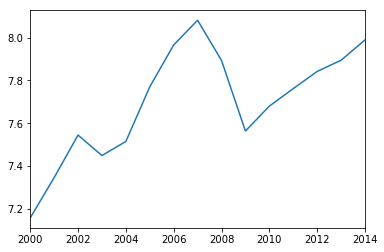

In [73]:
### Sampling
sample = caribbean_df.iloc[20:35]
sample['bah_rgdp'].plot()

In [84]:
### Restrict sample to periods of rgdp increasing and unemployment decreasing
caribbean_df['bah_dunemp_rate'] = caribbean_df['bah_unemp_rate'].pct_change()
caribbean_df['bah_dlunemp_rate'] = np.log(1 + caribbean_df['bah_dunemp_rate'])
sample = caribbean_df[(caribbean_df['bah_dlunemp_rate'] < 0) & (caribbean_df['bah_dlrgdp'] > 0)].loc[2000:2014]
sample['bah_dlrgdp']

2000    0.040652
2001    0.025917
2004    0.008790
2005    0.033389
2006    0.024857
2012    0.010281
Name: bah_dlrgdp, dtype: float64